# MLP

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
from utils import display

## Parameters

In [5]:
NUM_CLASSES = 10

## Prepare the data

In [6]:
from tensorflow.keras import datasets 
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [9]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [10]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [13]:
x_train.max()

np.uint8(255)

In [14]:
from tensorflow.keras import utils

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)



In [15]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [16]:
x_train.max()

np.float32(1.0)

## Build the model

In [22]:
from tensorflow.keras import layers, models, optimizers

# Defining all the layers of the model
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(10, activation="softmax")(x)

# Creating the model
model = models.Model(input_layer, output_layer)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [23]:
# model.compile(optimizer="adam", 
#               loss="categorical_crossentropy", 
#               metrics=["accuracy"])

# Same as above but with a different optimizer
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

model.fit(x_train, 
          y_train, 
          epochs=10, 
          batch_size=32,
          shuffle=True,
          validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2876 - loss: 1.9715 - val_accuracy: 0.3489 - val_loss: 1.8139
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3972 - loss: 1.6916 - val_accuracy: 0.4210 - val_loss: 1.6211
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4317 - loss: 1.5951 - val_accuracy: 0.4323 - val_loss: 1.6030
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4421 - loss: 1.5613 - val_accuracy: 0.4435 - val_loss: 1.5726
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4591 - loss: 1.5164 - val_accuracy: 0.4538 - val_loss: 1.5312
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4676 - loss: 1.4822 - val_accuracy: 0.4665 - val_loss: 1.5017
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4814 - loss: 1.4593 - val_accuracy: 0.4658 - val_loss: 1.5075
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4817 - loss: 1.4455 - 

In [24]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.4782 - loss: 1.4911


[1.485386610031128, 0.48260000348091125]

In [25]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


In [26]:
preds

array([[6.88808411e-02, 6.58229366e-02, 3.00646536e-02, ...,
        9.27389041e-03, 1.51274189e-01, 6.96908217e-03],
       [2.63402965e-02, 1.10550255e-01, 5.00566442e-04, ...,
        2.09086633e-04, 2.30718970e-01, 6.31360233e-01],
       [1.10820331e-01, 1.78840533e-01, 1.04163459e-03, ...,
        3.90603486e-03, 5.76372385e-01, 1.26859188e-01],
       ...,
       [1.76751651e-02, 2.86456267e-03, 1.03083774e-01, ...,
        2.18013167e-01, 6.87033534e-02, 3.94196669e-03],
       [3.14701460e-02, 3.05355042e-02, 1.85676008e-01, ...,
        2.45917380e-01, 1.00356918e-02, 4.03840132e-02],
       [6.54281601e-02, 1.47394603e-02, 4.87561673e-02, ...,
        6.68155730e-01, 2.45617628e-02, 1.52020995e-02]], dtype=float32)

In [28]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

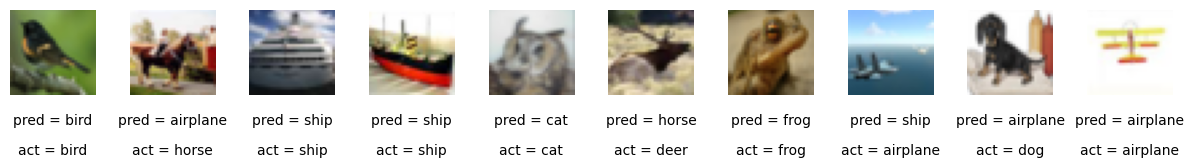

In [30]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)